In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                           precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv('D:\\IRIS.csv')
df

,Sepal length,Sepal width,Petal length,Petal width,Specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df.head(20)

,Sepal length,Sepal width,Petal length,Petal width,Specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Specie        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Specie          0
dtype: int64

In [35]:
df.count()

Sepal length    150
Sepal width     150
Petal length    150
Petal width     150
Species         150
dtype: int64

In [37]:
species_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("\nEncoded Species Mapping:", species_map)


Encoded Species Mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [39]:
species_counts = df['Species'].value_counts(normalize=True) * 100
for code, percent in species_counts.items():
    print(f"Percentage of {species_map[code]} in dataset = {percent:.2f}%")

Percentage of Iris-setosa in dataset = 33.33%
Percentage of Iris-versicolor in dataset = 33.33%
Percentage of Iris-virginica in dataset = 33.33%


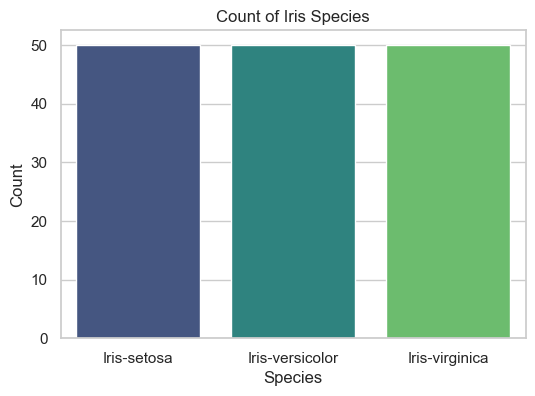

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df, palette='viridis') 
plt.title("Count of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=species_map.values())  
plt.show()

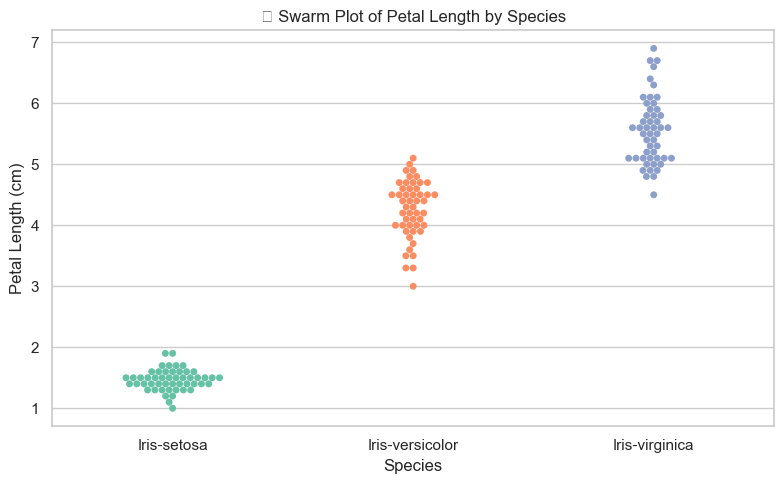

In [41]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='Species', y='Petal length', data=df, palette='Set2')

plt.title("🪰 Swarm Plot of Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.xticks(ticks=[0, 1, 2], labels=species_map.values())  
plt.tight_layout()
plt.show()

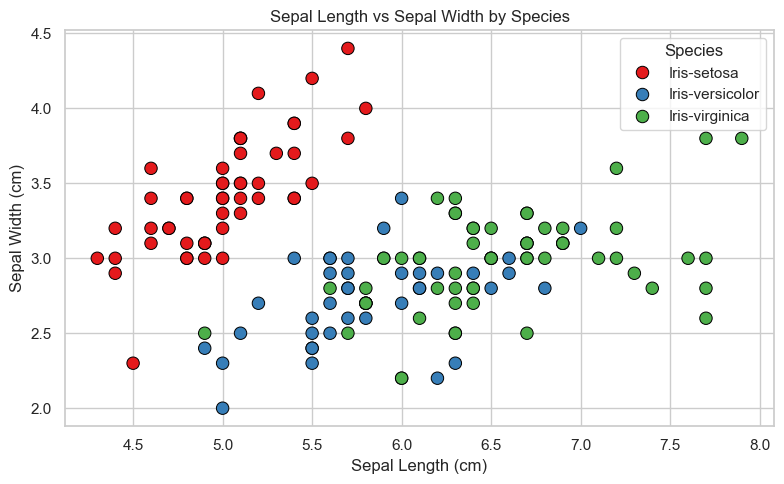

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Sepal length', 
    y='Sepal width', 
    hue=df['Species'].map(species_map), 
    data=df,
    palette='Set1',
    s=80, edgecolor='black'
)
plt.title("Sepal Length vs Sepal Width by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.tight_layout()
plt.show()

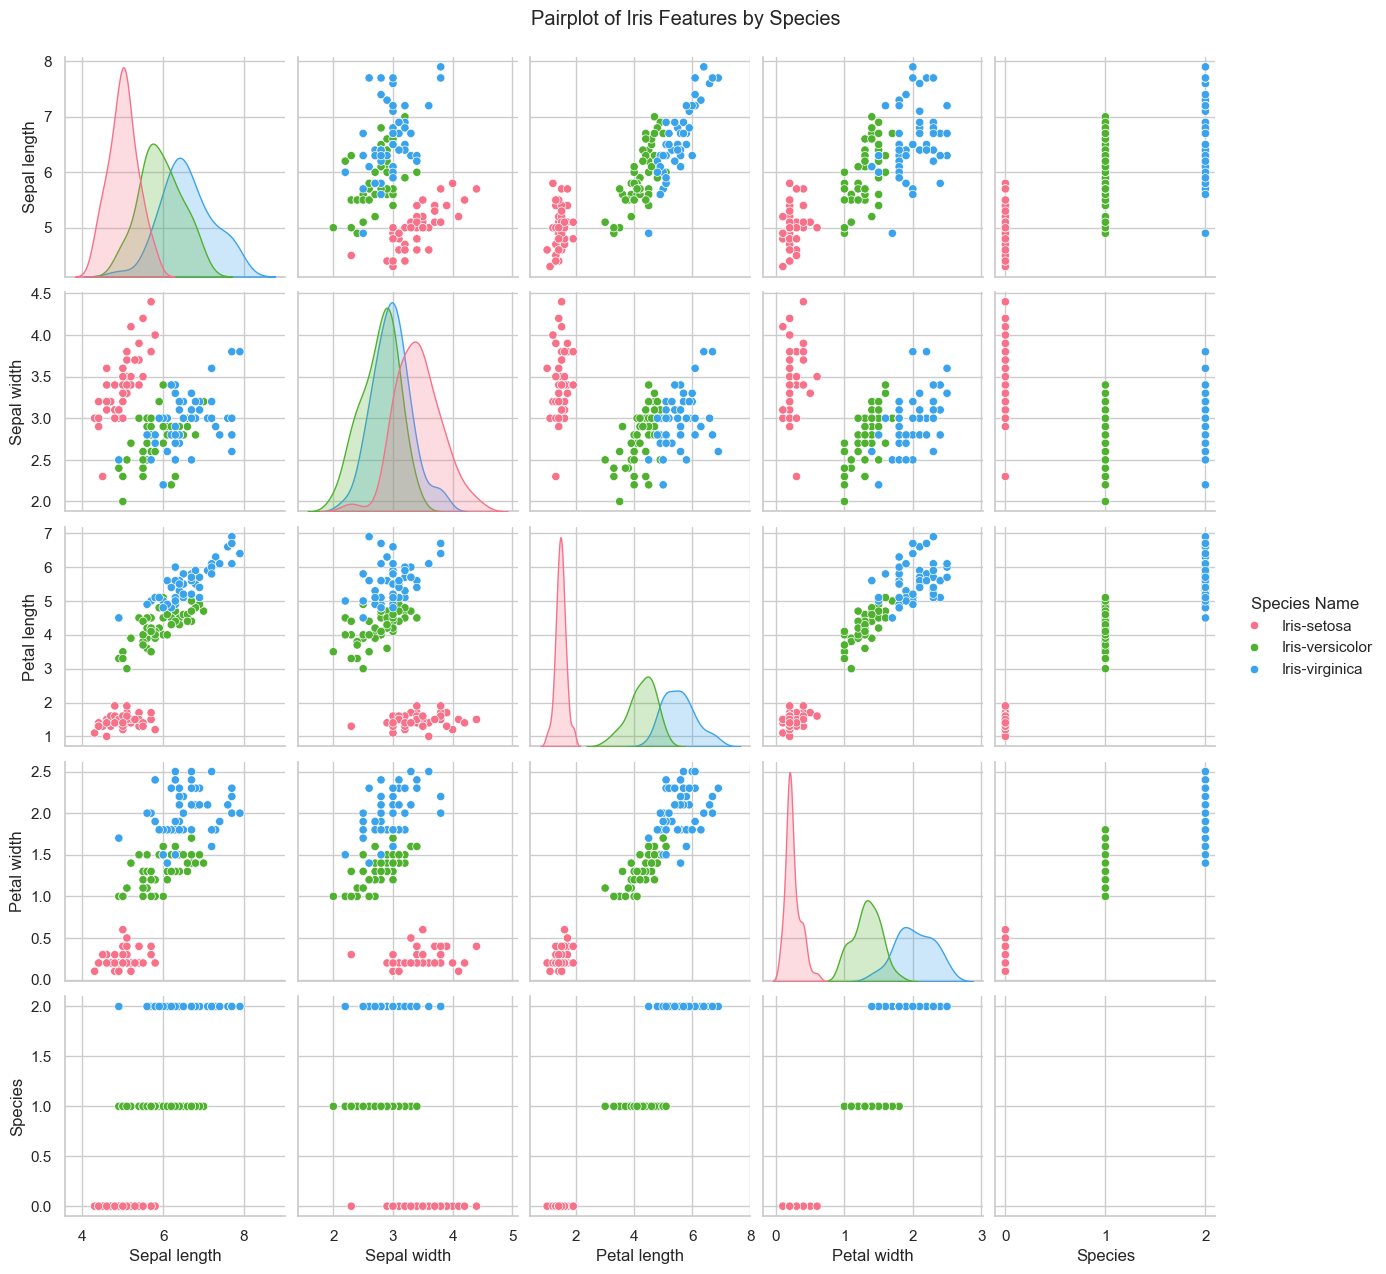

In [43]:
df['Species Name'] = df['Species'].map(species_map)
sns.pairplot(df, hue='Species Name', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()
df.drop("Species Name", axis=1, inplace=True)

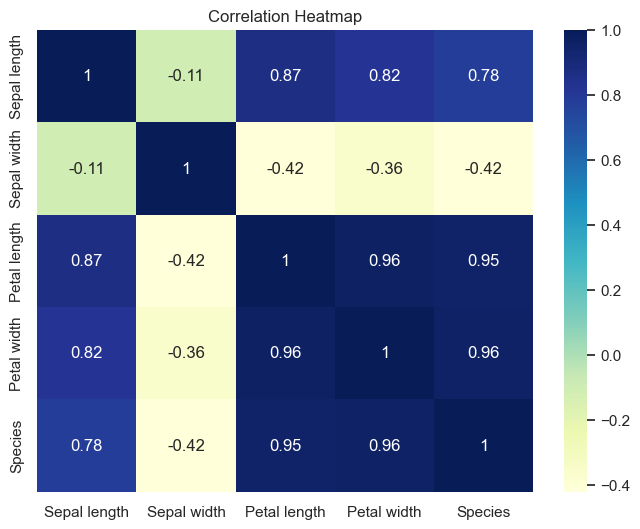

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [48]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width,Species
Sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


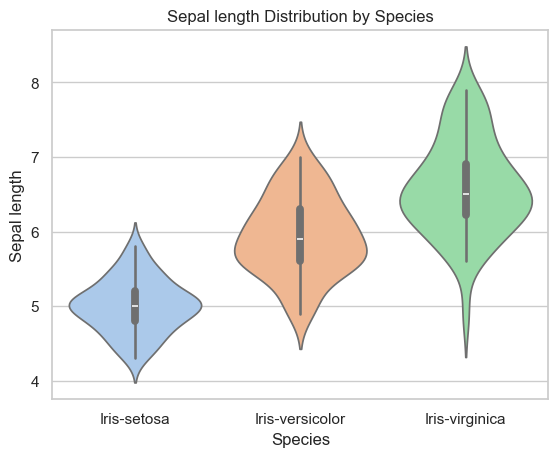

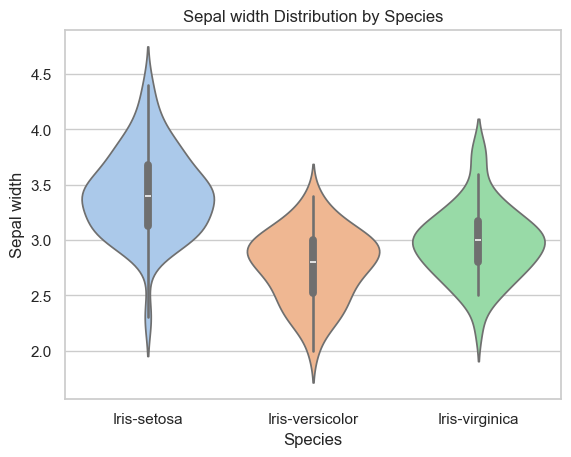

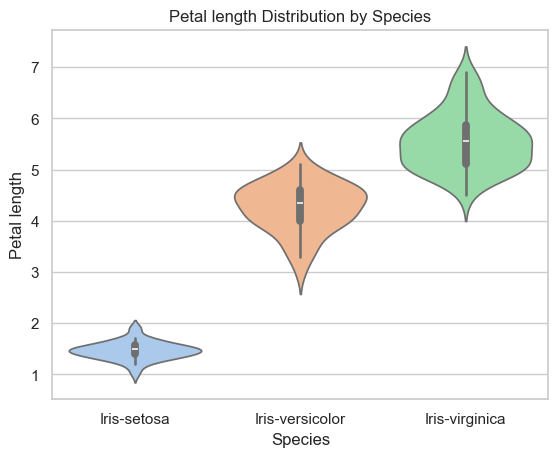

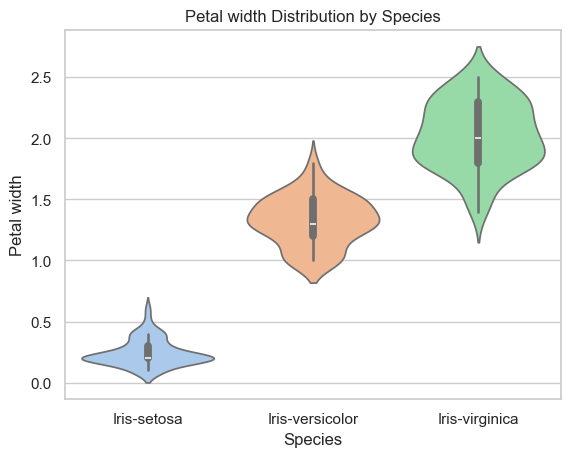

In [45]:
features = df.columns[:-1]
for feature in features:
    sns.violinplot(x='Species', y=feature, data=df, palette='pastel')
    plt.title(f"{feature} Distribution by Species")
    plt.xticks(ticks=[0, 1, 2], labels=species_map.values())
    plt.show()

In [49]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [53]:
y_pred = model.predict(X_test_scaled)

In [54]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=species_map.values()))


Accuracy: 0.9666666666666667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



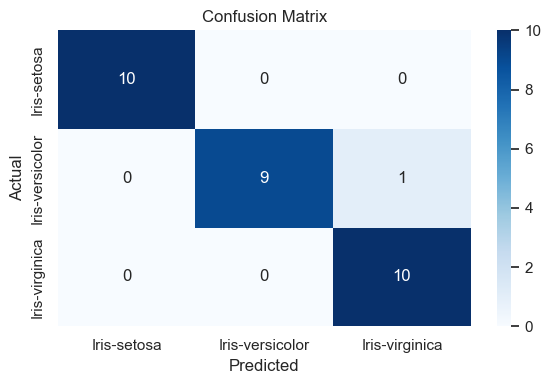

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=species_map.values(),
            yticklabels=species_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [56]:
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")

SVM Accuracy: 0.97
Random Forest Accuracy: 0.90
KNN Accuracy: 0.93
